# Behavioral analysis
This notebook analyses the eye-tracking behavioral data from wd_room experiment.
Participants were instructed to attend a fixation-cross preceeding stimulus presentation.
We defined a valid trial as those where participants fixated to the center of the image (as instructed) for at least 70-80 % of the duration of stimulus presentation (500 ms)

In [226]:
import glob, random
import os
from tqdm.notebook import tqdm
from scipy.ndimage.filters import gaussian_filter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
sns.set_style("white")
pd.options.display.float_format = '{:.3f}'.format

/var/folders/yy/s3wgmwl10fg_cc7cb_s92snr0000gn/T/ipykernel_14823/3985105610.py:4: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [227]:
# eye_path =  "data/eye_tracking/"
eye_path =  "data/streams_csv/"
df = pd.read_csv(eye_path + "all_streams_87c8f5f3-9dc8-481b-821e-7fc676da19f5.csv")
df_performance = pd.read_csv("data/triggers/total_unique_images_per_user.csv")
# df = pd.read_csv(eye_path + "et_87c8f5f3-9dc8-481b-821e-7fc676da19f5.csv")


/opt/anaconda3/envs/DefaultPython3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3433: DtypeWarning: Columns (14,16,59,60,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1. Eye-tracking analysis

In [228]:
# select uid to keep for analysis
keep_uid = ['cce2217f-677a-4b91-9a3b-3cee0abc396c','6a23f1a0-bdeb-4afd-af1c-cd7e607a93e0','a9412d68-6eaf-4a1f-ab61-b2f408ac5b47','87c8f5f3-9dc8-481b-821e-7fc676da19f5','50ad9e5b-fb4c-4e3e-92ea-bf422d43d4d6','0f06d331-98f0-419a-8a39-17be51b6bfff','7d4ab496-f88c-4965-9a8f-4aaa9ae50f13','9e3d1bd2-e8c6-4ae0-ad31-fe1a6199c62b','7afcd75b-9094-4fdf-9e33-70a99439deda','9771ad44-64a5-476d-90e9-d591ad1f6e2c','02c5e2dc-2cd8-4d48-9d4e-16d55a8fe6d2','723c8bc5-7809-4dfc-990c-36de0f544b72','7d9620d5-bbd8-4c63-ab0b-72a3e0a0137a']

## 1.1 Images display latencies

In [229]:
df

,uid,blockNumber_ImageInfo,imageName_ImageInfo,time_stamps_ImageInfo,corrected_tstamps_ImageInfo,normalized_tstamps_ImageInfo,cFrame_Visual,displayStatus_Visual,worldTime_Visual,time_stamps_Visual,...,centered_fixations,total_fixations,valid_fixation,ob_names,latency,type,valid,rotation,distance,block
0,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,startMessage,74451.194,74451.002,0.011,4329.000,-1.000,85.366,74451.194,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,startMessage,74451.206,74451.014,0.022,4330.000,-1.000,85.377,74451.206,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,startMessage,74451.217,74451.025,0.033,4331.000,-1.000,85.388,74451.217,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,startMessage,74451.228,74451.036,0.044,4332.000,-1.000,85.399,74451.228,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,startMessage,74451.239,74451.047,0.055,4333.000,-1.000,85.410,74451.239,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381083,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,endMessage,78909.145,78908.852,4457.861,385406.000,99.000,4543.284,78909.145,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
381084,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,endMessage,78909.155,78908.863,4457.872,385407.000,99.000,4543.295,78909.155,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
381085,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,endMessage,78909.166,78908.874,4457.883,385408.000,99.000,4543.306,78909.166,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
381086,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,endMessage,78909.178,78908.886,4457.894,385409.000,99.000,4543.317,78909.178,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [230]:
# eye_df = df[df['displayStatusNames'] == 'image']
eye_df = df

(-1.0, 1.0)

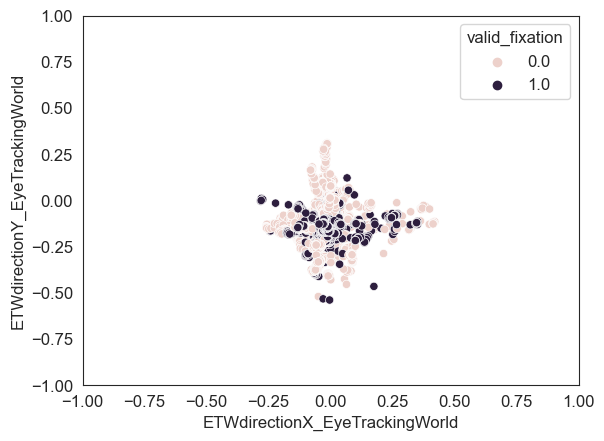

In [231]:
g = sns.scatterplot(x=eye_df['ETWdirectionX_EyeTrackingWorld'],y=eye_df['ETWdirectionY_EyeTrackingWorld'],hue='valid_fixation', data=eye_df)
g.set_xlim(-1,1)
g.set_ylim(-1,1)

<Axes: ylabel='Count'>

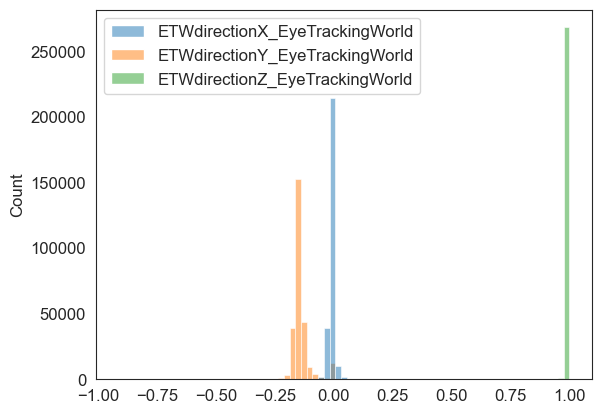

In [232]:
sns.histplot(data=df[['ETWdirectionX_EyeTrackingWorld','ETWdirectionY_EyeTrackingWorld','ETWdirectionZ_EyeTrackingWorld']])

<Axes: >

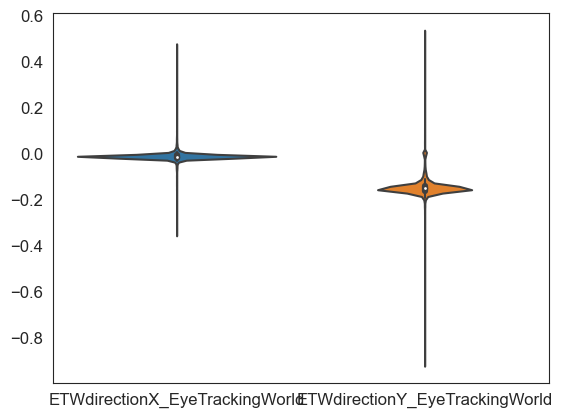

In [233]:
# sns.boxplot(data=eye_df[['ETWdirectionX_EyeTrackingWorld','ETWdirectionY_EyeTrackingWorld']], showfliers=True)
sns.violinplot(data=eye_df[['ETWdirectionX_EyeTrackingWorld','ETWdirectionY_EyeTrackingWorld']])

In [234]:
eye_valid = eye_df[eye_df['valid_fixation'] == True]
eye_valid

,uid,blockNumber_ImageInfo,imageName_ImageInfo,time_stamps_ImageInfo,corrected_tstamps_ImageInfo,normalized_tstamps_ImageInfo,cFrame_Visual,displayStatus_Visual,worldTime_Visual,time_stamps_Visual,...,centered_fixations,total_fixations,valid_fixation,ob_names,latency,type,valid,rotation,distance,block
1158,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_20-03-02.hitname...,74464.056,74463.863,12.872,5487.000,0.000,98.227,74464.056,...,46.000,46.000,True,Cathedral,12.872,object,1,3.000,17.000,0.000
1159,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_20-03-02.hitname...,74464.066,74463.874,12.883,5488.000,0.000,98.238,74464.066,...,46.000,46.000,True,Cathedral,NaN,NaN,1,NaN,NaN,NaN
1160,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_20-03-02.hitname...,74464.078,74463.885,12.894,5489.000,0.000,98.249,74464.078,...,46.000,46.000,True,Cathedral,NaN,NaN,1,NaN,NaN,NaN
1161,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_20-03-02.hitname...,74464.089,74463.896,12.905,5490.000,0.000,98.260,74464.089,...,46.000,46.000,True,Cathedral,NaN,NaN,1,NaN,NaN,NaN
1162,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_20-03-02.hitname...,74464.100,74463.907,12.916,5491.000,0.000,98.271,74464.100,...,46.000,46.000,True,Cathedral,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381059,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,img.1600x1000.date.2022-07-12_00-01-19.hitname...,78908.878,78908.586,4457.594,385382.000,0.000,4543.018,78908.878,...,39.000,45.000,True,Trashcans_mesh (4),NaN,NaN,1,NaN,NaN,NaN
381060,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,img.1600x1000.date.2022-07-12_00-01-19.hitname...,78908.889,78908.597,4457.605,385383.000,0.000,4543.029,78908.889,...,39.000,45.000,True,Trashcans_mesh (4),NaN,NaN,1,NaN,NaN,NaN
381061,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,img.1600x1000.date.2022-07-12_00-01-19.hitname...,78908.900,78908.608,4457.617,385384.000,0.000,4543.040,78908.900,...,39.000,45.000,True,Trashcans_mesh (4),NaN,NaN,1,NaN,NaN,NaN
381062,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,img.1600x1000.date.2022-07-12_00-01-19.hitname...,78908.911,78908.619,4457.628,385385.000,0.000,4543.051,78908.911,...,39.000,45.000,True,Trashcans_mesh (4),NaN,NaN,1,NaN,NaN,NaN


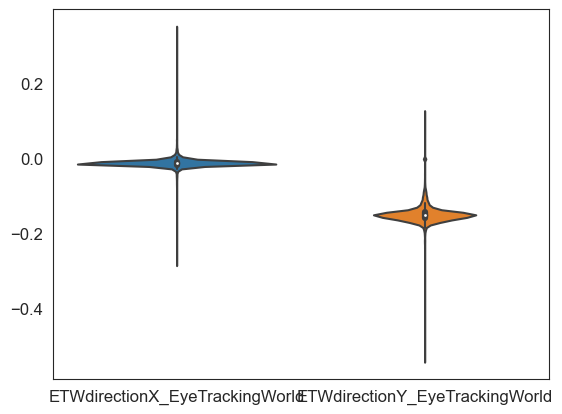

In [235]:
p = sns.violinplot(data=eye_valid[['ETWdirectionX_EyeTrackingWorld','ETWdirectionY_EyeTrackingWorld']], showfliers=False)

In [236]:
eye_nonull = eye_valid.dropna(subset=['ETWoriginX_EyeTrackingWorld','ETWoriginY_EyeTrackingWorld'], how='all')
eye_nonull.isna().sum()

uid                                0
blockNumber_ImageInfo              0
imageName_ImageInfo                0
time_stamps_ImageInfo              0
corrected_tstamps_ImageInfo        0
                               ...  
type                           69063
valid                              0
rotation                       69063
distance                       69063
block                          69063
Length: 67, dtype: int64

In [237]:
s_img = plt.imread("/Users/johnmadrid/GitHub/screenshots_processing/data/images/faces/faces/img.1600x1000.date.2022-07-07_19-53-15.hitname.face_217.rotation.8.distance.1.frame.78367.png")

<Figure size 1600x800 with 0 Axes>

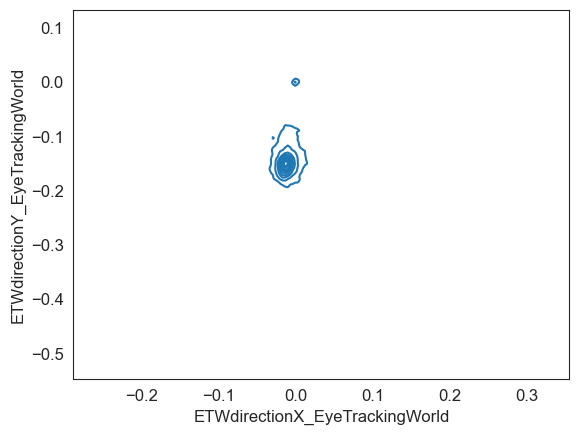

<Figure size 1600x800 with 0 Axes>

In [238]:
plt.rcParams.update({'font.size': 12})
# plt.figure(figsize=(16,8))
# plt.imshow(img, alpha = 0.2)
# plt.axis('off');
#

# grid = img.shape[0:2] # height, width of the loaded image

p = sns.kdeplot(x='ETWdirectionX_EyeTrackingWorld',y='ETWdirectionY_EyeTrackingWorld', data=eye_nonull)#, fill=True, cbar=True, hue='valid')#,cmap="jet")
# # ax.set_xlim(-1,1)
# # ax.set_ylim(-1,1)
plt.figure(figsize=(16,8))
# plt.imshow(img, alpha = 0.2)
# plt.imshow(p)
# plt.axis('off')


In [239]:
s_img_path = "/Users/johnmadrid/GitHub/screenshots_processing/data/images/faces/faces/img.1600x1000.date.2022-07-07_19-53-15.hitname.face_217.rotation.8.distance.1.frame.78367.png"

In [240]:
file_path_type = "/Users/johnmadrid/GitHub/screenshots_processing/data/images/faces/faces/*.png"

eye_nonull[eye_nonull['imageName_ImageInfo'] == s_img_path.split('/')[-1][:-4]]

,uid,blockNumber_ImageInfo,imageName_ImageInfo,time_stamps_ImageInfo,corrected_tstamps_ImageInfo,normalized_tstamps_ImageInfo,cFrame_Visual,displayStatus_Visual,worldTime_Visual,time_stamps_Visual,...,centered_fixations,total_fixations,valid_fixation,ob_names,latency,type,valid,rotation,distance,block
21298,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_19-53-15.hitname...,74687.833,74687.636,236.645,25636.000,0.000,322.003,74687.833,...,46.000,46.000,True,face_217,236.645,face,1,8.000,1.000,0.000
21299,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_19-53-15.hitname...,74687.844,74687.647,236.655,25637.000,0.000,322.014,74687.844,...,46.000,46.000,True,face_217,NaN,NaN,1,NaN,NaN,NaN
21300,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_19-53-15.hitname...,74687.855,74687.658,236.667,25638.000,0.000,322.025,74687.855,...,46.000,46.000,True,face_217,NaN,NaN,1,NaN,NaN,NaN
21301,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_19-53-15.hitname...,74687.866,74687.669,236.678,25639.000,0.000,322.036,74687.866,...,46.000,46.000,True,face_217,NaN,NaN,1,NaN,NaN,NaN
21302,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_19-53-15.hitname...,74687.877,74687.680,236.689,25640.000,0.000,322.047,74687.877,...,46.000,46.000,True,face_217,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340091,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,img.1600x1000.date.2022-07-07_19-53-15.hitname...,78453.670,78453.388,4002.397,344395.000,0.000,4087.814,78453.670,...,46.000,46.000,True,face_217,NaN,NaN,1,NaN,NaN,NaN
340092,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,img.1600x1000.date.2022-07-07_19-53-15.hitname...,78453.682,78453.400,4002.408,344396.000,0.000,4087.825,78453.682,...,46.000,46.000,True,face_217,NaN,NaN,1,NaN,NaN,NaN
340093,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,img.1600x1000.date.2022-07-07_19-53-15.hitname...,78453.693,78453.411,4002.419,344397.000,0.000,4087.836,78453.693,...,46.000,46.000,True,face_217,NaN,NaN,1,NaN,NaN,NaN
340094,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,img.1600x1000.date.2022-07-07_19-53-15.hitname...,78453.704,78453.422,4002.430,344398.000,0.000,4087.847,78453.704,...,46.000,46.000,True,face_217,NaN,NaN,1,NaN,NaN,NaN


In [391]:
# Create heatmap with eye tracking data
def create_eye_heatmap(df, img_path = '', multiple=False):
    # choose a random img
    images = glob.glob(img_path)
    random_image = random.choice(images)
    sample_img= plt.imread(random_image)
    sample_img_data = df[df['imageName_ImageInfo'] == random_image.split('/')[-1][:-4]]
    # 0.01 and 0.15 are the x and y coordinate positions of the gazes object in the 3d world
    gaze_on_surf_x = sample_img_data.ETWdirectionX_EyeTrackingWorld + 0.01
    gaze_on_surf_y = sample_img_data.ETWdirectionY_EyeTrackingWorld + 0.15 

    grid = sample_img.shape[0:2] # height and width of the sample image
    heatmap_detail = 0.04 #0.05 # determine the gaussian blur kernel of the img (higher number = more blur)

    # flip the fixation points from the original coordinate system, where the origin is at botton left,
    # to the image coordinate system, where the origin is at top left
    # gaze_on_surf_y = gaze_on_surf_y

    # make the histogram
    hist, x_edges, y_edges = np.histogram2d(
        x=-gaze_on_surf_y,
        y=-gaze_on_surf_x,
        range=[[-1, 1.0], [-1, 1.0]],
        normed=False,
        bins=grid
    )
    # gaussian blur kernel as a function of grid/surface size
    filter_h = int(heatmap_detail * grid[0])# // 2 * 2 + 1
    filter_w = int(heatmap_detail * grid[1])# // 2 * 2 + 1
    heatmap = gaussian_filter(hist, sigma=(filter_w, filter_h), order=0)
    if multiple:
        return sample_img, heatmap
    # fig, ax = plt.subplots(1,1,figsize=(8,5))
    # p = sns.kdeplot(x=gaze_on_surf_x,y=gaze_on_surf_y, ax=ax)#, fill=True, cbar=True, hue='valid')#,cmap="jet")
    # ax.set_xlim(-.5,.5)
    # ax.set_ylim(-.5,.5)
    # ax.set_xlabel('')
    # ax.set_ylabel('')
    # print(f"x-min: {np.min(gaze_on_surf_x)}, x-max: {np.max(gaze_on_surf_x)}")
    # print(f"y-min: {np.min(gaze_on_surf_y)}, y-max: {np.max(gaze_on_surf_y)}")

    # sample img with eye heatmap
    plt.figure(figsize=(8,5))
    plt.imshow(sample_img)
    plt.imshow(heatmap, cmap='jet', alpha=0.45)
    plt.axis('off');

## to be able to Debug the code
# eye_heatmap_img = create_eye_heatmap(eye_nonull, img_path=file_path_type,save=False)
# eye_heatmap_img

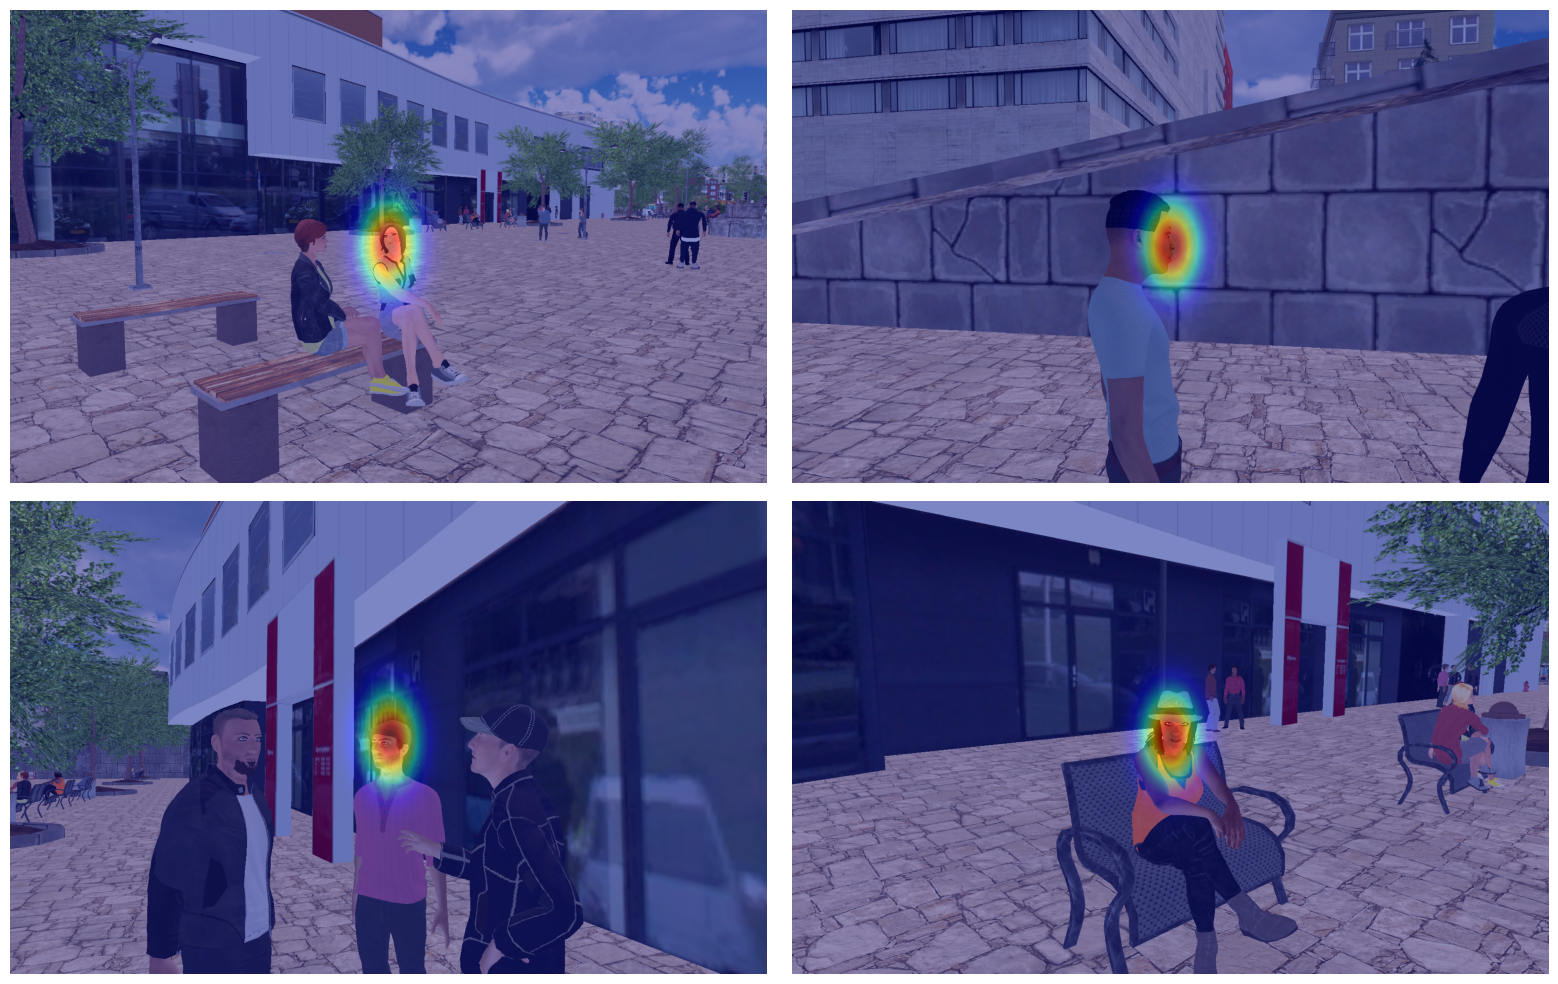

In [392]:
# create multiple eye_heatmap subplots
f, axarr = plt.subplots(2,2,figsize=(16,10))
axes = [[0,0],[0,1],[1,0],[1,1]]
for i, ax in enumerate(axes):
    img_s, h, = create_eye_heatmap(eye_nonull, img_path=file_path_type,multiple=True)
    axarr[axes[i][0],axes[i][1]].imshow(img_s)
    axarr[axes[i][0],axes[i][1]].imshow(h, cmap='jet', alpha=0.45)
    axarr[axes[i][0],axes[i][1]].axis('off')
    plt.tight_layout()

Visualize different Gaussian plots of eye data allocations

In [191]:
# visualize different Gusssian plots of eye data allocations
# import matplotlib.cm as cm
# from scipy.ndimage import gaussian_filter
#
# def myplot(x, y, s, bins=len(eye_nonull['ETWdirectionX_EyeTrackingWorld'])):
#     heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
#     heatmap = gaussian_filter(heatmap, sigma=s)
#
#     extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
#     return heatmap.T, extent
#
#
# fig, axs = plt.subplots(2, 2)
#
# # Generate some test data
# x = np.array(eye_nonull['ETWdirectionX_EyeTrackingWorld'])
# y = np.array(eye_nonull['ETWdirectionY_EyeTrackingWorld'])
#
# sigmas = [0, 16, 32, 64]

# for ax, s in zip(axs.flatten(), sigmas):
#     if s == 0:
#         ax.plot(x, y, 'k.', markersize=5)
#         ax.set_title("Scatter plot")
#     else:
#         img, extent = myplot(x, y, s)
#         ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
#         ax.set_title("Smoothing with  $\sigma$ = %d" % s)
# plt.tight_layout()
# plt.show()

## 1.2 Images display latencies

In [283]:
# read all .csv files
csv_files = os.listdir(eye_path)
csv_files

['all_streams_7afcd75b-9094-4fdf-9e33-70a99439deda.csv',
 'all_streams_7d4ab496-f88c-4965-9a8f-4aaa9ae50f13.csv',
 'all_streams_87c8f5f3-9dc8-481b-821e-7fc676da19f5.csv',
 'all_streams_7d9620d5-bbd8-4c63-ab0b-72a3e0a0137a.csv',
 '.DS_Store',
 'all_streams_f8780dc1-6310-4759-9d7b-a59548ab6397.csv',
 'all_streams_6a23f1a0-bdeb-4afd-af1c-cd7e607a93e0.csv',
 'all_streams_02c5e2dc-2cd8-4d48-9d4e-16d55a8fe6d2.csv',
 'all_streams_c304049a-99c5-4184-abd1-ba2178c5e1e6.csv',
 'all_streams_0f06d331-98f0-419a-8a39-17be51b6bfff.csv',
 'all_streams_50ad9e5b-fb4c-4e3e-92ea-bf422d43d4d6.csv',
 'all_streams_9e3d1bd2-e8c6-4ae0-ad31-fe1a6199c62b.csv',
 'all_streams_944be082-2674-42b2-9f50-7849d9e14946.csv',
 'all_streams_41862e7e-bb0d-484c-9149-37175debeff7.csv',
 'all_streams_ed990ae1-f2e6-4e25-b6c1-e596181c248a.csv',
 'all_streams_9771ad44-64a5-476d-90e9-d591ad1f6e2c.csv',
 'all_streams_a9412d68-6eaf-4a1f-ab61-b2f408ac5b47.csv',
 'all_streams_cce2217f-677a-4b91-9a3b-3cee0abc396c.csv',
 'all_streams_723

In [284]:
path_selected_files = []
for id in keep_uid:
    for file in os.listdir(eye_path):
        if id in file:
            csv_path = os.path.join(eye_path, file)
            # print(csv_file)
            path_selected_files.append(csv_path)
path_selected_files

['data/streams_csv/all_streams_cce2217f-677a-4b91-9a3b-3cee0abc396c.csv',
 'data/streams_csv/all_streams_6a23f1a0-bdeb-4afd-af1c-cd7e607a93e0.csv',
 'data/streams_csv/all_streams_a9412d68-6eaf-4a1f-ab61-b2f408ac5b47.csv',
 'data/streams_csv/all_streams_87c8f5f3-9dc8-481b-821e-7fc676da19f5.csv',
 'data/streams_csv/all_streams_50ad9e5b-fb4c-4e3e-92ea-bf422d43d4d6.csv',
 'data/streams_csv/all_streams_0f06d331-98f0-419a-8a39-17be51b6bfff.csv',
 'data/streams_csv/all_streams_7d4ab496-f88c-4965-9a8f-4aaa9ae50f13.csv',
 'data/streams_csv/all_streams_9e3d1bd2-e8c6-4ae0-ad31-fe1a6199c62b.csv',
 'data/streams_csv/all_streams_7afcd75b-9094-4fdf-9e33-70a99439deda.csv',
 'data/streams_csv/all_streams_9771ad44-64a5-476d-90e9-d591ad1f6e2c.csv',
 'data/streams_csv/all_streams_02c5e2dc-2cd8-4d48-9d4e-16d55a8fe6d2.csv',
 'data/streams_csv/all_streams_723c8bc5-7809-4dfc-990c-36de0f544b72.csv',
 'data/streams_csv/all_streams_7d9620d5-bbd8-4c63-ab0b-72a3e0a0137a.csv']

In [285]:
# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(f, usecols=['uid','time_stamps_EyeTrackingWorld','displayStatusNames','imageName_ImageInfo','shiftID','normalized_tstamps_ImageInfo','ETWdirectionX_EyeTrackingWorld','ETWdirectionY_EyeTrackingWorld']) for f in path_selected_files)

# Concatenate all DataFrames
df_all_files   = pd.concat(df_list, ignore_index=True)
df_all_files

/opt/anaconda3/envs/DefaultPython3/lib/python3.8/site-packages/pandas/core/reshape/concat.py:348: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  objs = list(objs)


,uid,imageName_ImageInfo,normalized_tstamps_ImageInfo,shiftID,displayStatusNames,ETWdirectionX_EyeTrackingWorld,ETWdirectionY_EyeTrackingWorld,time_stamps_EyeTrackingWorld
0,cce2217f-677a-4b91-9a3b-3cee0abc396c,startMessage,20.498,0,startMessage,NaN,NaN,NaN
1,cce2217f-677a-4b91-9a3b-3cee0abc396c,startMessage,20.499,0,startMessage,NaN,NaN,NaN
2,cce2217f-677a-4b91-9a3b-3cee0abc396c,startMessage,20.500,0,startMessage,NaN,NaN,NaN
3,cce2217f-677a-4b91-9a3b-3cee0abc396c,startMessage,20.500,0,startMessage,NaN,NaN,NaN
4,cce2217f-677a-4b91-9a3b-3cee0abc396c,startMessage,20.500,0,startMessage,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4704434,7d9620d5-bbd8-4c63-ab0b-72a3e0a0137a,endMessage,3953.361,5044,endMessage,NaN,NaN,NaN
4704435,7d9620d5-bbd8-4c63-ab0b-72a3e0a0137a,endMessage,3953.372,5044,endMessage,NaN,NaN,NaN
4704436,7d9620d5-bbd8-4c63-ab0b-72a3e0a0137a,endMessage,3953.383,5044,endMessage,NaN,NaN,NaN
4704437,7d9620d5-bbd8-4c63-ab0b-72a3e0a0137a,endMessage,3953.394,5044,endMessage,NaN,NaN,NaN


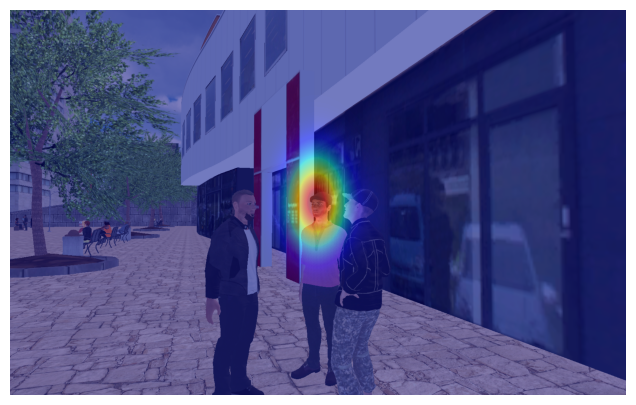

In [296]:
group_eye_heatmap = create_eye_heatmap(df_all_files, img_path=file_path_type, save=False)
group_eye_heatmap

In [19]:
event_lengths = df_all_files[~df_all_files['time_stamps_EyeTrackingWorld'].isnull()].groupby(['uid','displayStatusNames','shiftID'])['normalized_tstamps_ImageInfo'].apply(lambda g: g.max() - g.min()).reset_index()
event_lengths

,uid,displayStatusNames,shiftID,normalized_tstamps_ImageInfo
0,02c5e2dc-2cd8-4d48-9d4e-16d55a8fe6d2,fixCross,2,0.498276
1,02c5e2dc-2cd8-4d48-9d4e-16d55a8fe6d2,fixCross,5,0.499777
2,02c5e2dc-2cd8-4d48-9d4e-16d55a8fe6d2,fixCross,8,0.499629
3,02c5e2dc-2cd8-4d48-9d4e-16d55a8fe6d2,fixCross,11,0.499769
4,02c5e2dc-2cd8-4d48-9d4e-16d55a8fe6d2,fixCross,14,0.499520
...,...,...,...,...
65424,cce2217f-677a-4b91-9a3b-3cee0abc396c,image,5034,0.499775
65425,cce2217f-677a-4b91-9a3b-3cee0abc396c,image,5037,0.499557
65426,cce2217f-677a-4b91-9a3b-3cee0abc396c,image,5040,0.499601
65427,cce2217f-677a-4b91-9a3b-3cee0abc396c,image,5043,0.488428


In [20]:
# exclude star and endtMessage categories
df_excl_message = event_lengths[~event_lengths['displayStatusNames'].str.contains('Message')]
df_excl_message

,uid,displayStatusNames,shiftID,normalized_tstamps_ImageInfo
0,02c5e2dc-2cd8-4d48-9d4e-16d55a8fe6d2,fixCross,2,0.498276
1,02c5e2dc-2cd8-4d48-9d4e-16d55a8fe6d2,fixCross,5,0.499777
2,02c5e2dc-2cd8-4d48-9d4e-16d55a8fe6d2,fixCross,8,0.499629
3,02c5e2dc-2cd8-4d48-9d4e-16d55a8fe6d2,fixCross,11,0.499769
4,02c5e2dc-2cd8-4d48-9d4e-16d55a8fe6d2,fixCross,14,0.499520
...,...,...,...,...
65423,cce2217f-677a-4b91-9a3b-3cee0abc396c,image,5031,0.499608
65424,cce2217f-677a-4b91-9a3b-3cee0abc396c,image,5034,0.499775
65425,cce2217f-677a-4b91-9a3b-3cee0abc396c,image,5037,0.499557
65426,cce2217f-677a-4b91-9a3b-3cee0abc396c,image,5040,0.499601


In [85]:
# event_lengths[event_lengths['displayStatusNames'] == "image"]
#df[(~df['time_stamps_EyeTrackingWorld'].isnull()) & (df['shiftID'] >= 632) & (df['shiftID'] <= 637)]
df_mean_std = df_excl_message.groupby('displayStatusNames')['normalized_tstamps_ImageInfo'].agg(['mean', 'std'])
df_mean_std*1000

,mean,std
displayStatusNames,,
fixCross,499.476407,1.310931
grayCanvas,744.623947,144.408299
image,499.440886,1.402905


In [81]:
dfi.export(df_mean_std, 'data/behavioral/display_mean_std_table.png')

60426 bytes written to file /var/folders/yy/s3wgmwl10fg_cc7cb_s92snr0000gn/T/tmp5v42l5hj/temp.png


In [51]:
def vis_display_duration(df, save=True):
    fig, ax = plt.subplots(1, 1, figsize=(6,5))
    plt.rcParams.update({'font.size': 12})
    fig.suptitle("Average Display Duration",fontsize=18, y=1, fontweight='bold')
    # sns.stripplot(data=df_excl_message.sample(10000), x='displayStatusNames', y='normalized_tstamps_ImageInfo', alpha=0.15)
    sns.boxplot(data=df, x='displayStatusNames', y='normalized_tstamps_ImageInfo',
                showmeans=True, width=0.2, **{'boxprops':{'facecolor':'none', 'edgecolor':'black'},'meanprops':{"markerfacecolor":"red", "markeredgecolor":"red"}})
    ax.set_ylabel("Duration [s]", fontsize=16)
    ax.set_xlabel("", fontsize=16)
    plt.tight_layout()
    if save:
        plt.savefig("data/behavioral/" + "avg_display_duration" + ".pdf",
                    format='pdf',bbox_inches='tight', dpi=1200)

In [52]:
vis_display_duration(df_excl_message, save=True)

NameError: name 'df_excl_message' is not defined

# 2. Performance's accuracy

In [340]:
df_performance

,block_number,total_img,valid,invalid,uid
0,0,210,406,12,ed990ae1-f2e6-4e25-b6c1-e596181c248a
1,1,210,410,10,ed990ae1-f2e6-4e25-b6c1-e596181c248a
2,2,210,418,2,ed990ae1-f2e6-4e25-b6c1-e596181c248a
3,3,210,418,3,ed990ae1-f2e6-4e25-b6c1-e596181c248a
4,0,210,399,20,dfb99d79-4595-4a0d-b346-23282e000f10
...,...,...,...,...,...
75,3,210,377,44,c304049a-99c5-4184-abd1-ba2178c5e1e6
76,0,210,413,6,7d9620d5-bbd8-4c63-ab0b-72a3e0a0137a
77,1,210,415,5,7d9620d5-bbd8-4c63-ab0b-72a3e0a0137a
78,2,210,402,18,7d9620d5-bbd8-4c63-ab0b-72a3e0a0137a


In [346]:
# choose only uids to keep
df_per_selected = df_performance[df_performance['uid'].isin(keep_uid)]
df_per_selected

,block_number,total_img,valid,invalid,uid
12,0,210,379,40,cce2217f-677a-4b91-9a3b-3cee0abc396c
13,1,210,389,31,cce2217f-677a-4b91-9a3b-3cee0abc396c
14,2,210,415,5,cce2217f-677a-4b91-9a3b-3cee0abc396c
15,3,210,396,25,cce2217f-677a-4b91-9a3b-3cee0abc396c
16,0,210,312,107,6a23f1a0-bdeb-4afd-af1c-cd7e607a93e0
17,1,210,358,62,6a23f1a0-bdeb-4afd-af1c-cd7e607a93e0
18,2,210,399,21,6a23f1a0-bdeb-4afd-af1c-cd7e607a93e0
19,3,210,383,38,6a23f1a0-bdeb-4afd-af1c-cd7e607a93e0
20,0,210,418,1,a9412d68-6eaf-4a1f-ab61-b2f408ac5b47
21,1,210,418,2,a9412d68-6eaf-4a1f-ab61-b2f408ac5b47


In [347]:
df_per_selected['uid'] =  df_per_selected['uid'].replace(keep_uid,['0','1','2','3','4','5','6','7','8','9','10','11','12'])
df_per_selected

/var/folders/yy/s3wgmwl10fg_cc7cb_s92snr0000gn/T/ipykernel_60339/950293743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_per_selected['uid'] =  df_per_selected['uid'].replace(keep_uid,['0','1','2','3','4','5','6','7','8','9','10','11','12'])


,block_number,total_img,valid,invalid,uid
12,0,210,379,40,0
13,1,210,389,31,0
14,2,210,415,5,0
15,3,210,396,25,0
16,0,210,312,107,1
17,1,210,358,62,1
18,2,210,399,21,1
19,3,210,383,38,1
20,0,210,418,1,2
21,1,210,418,2,2


In [348]:
df_per_selected['accuracy'] = df_per_selected.valid / (df_per_selected.valid + df_per_selected.invalid)

/var/folders/yy/s3wgmwl10fg_cc7cb_s92snr0000gn/T/ipykernel_60339/487497276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_per_selected['accuracy'] = df_per_selected.valid / (df_per_selected.valid + df_per_selected.invalid)


In [349]:
df_performance_begin = df_per_selected[df_per_selected['block_number'] < 2]
df_performance_end = df_per_selected[df_per_selected['block_number'] > 1]

accu_start = (df_performance_begin['accuracy'].agg(['mean','median'])*100).round(1)
accu_end = (df_performance_end['accuracy'].agg(['mean','median'])*100).round(1)
accu_start

mean      84.8
median    88.1
Name: accuracy, dtype: float64

In [350]:
accu_end

mean      84.1
median    91.2
Name: accuracy, dtype: float64

<Axes: xlabel='block_number', ylabel='accuracy'>

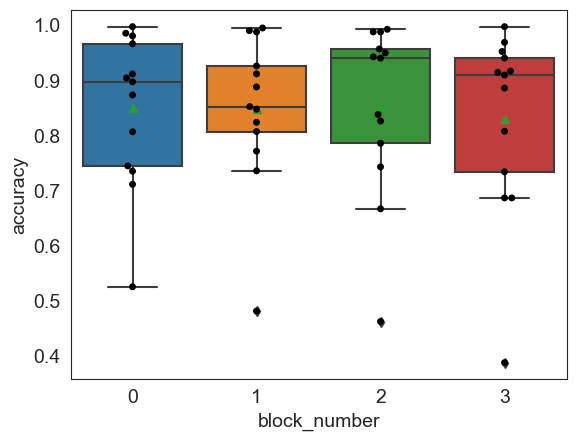

In [351]:
sns.boxplot(data=df_per_selected,x='block_number',y='accuracy', showmeans=True)
sns.swarmplot(data=df_per_selected,x='block_number',y='accuracy', color='black')

In [439]:
def visualize_performance(df,save=False):
    fig, ax = plt.subplots(2, 1, figsize=(8,7), sharex=True, gridspec_kw={'height_ratios': [1.2, 3],'hspace':0.05})
    plt.rcParams.update({'font.size': 12})
    fig.suptitle("Accuracy of performance",fontsize=26, y=1, fontweight='bold')
    # plot average performance across subjects
    p = sns.pointplot(data=df, x='block_number',y='accuracy', hue='total_img', linestyles=['--'], color='k',ax=ax[0])
    ax[0].set_ylabel("Accuracy [%]", fontsize=16)
    ax[0].set_xlabel("")
    ax[0].legend(title_fontsize='12',fontsize=10,bbox_to_anchor=(1.01, 1), loc=2, labels=['Mean'], borderaxespad=.05)

    # plot individual subject performance
    g = sns.pointplot(data=df, x='block_number', y='accuracy', hue='uid',ax=ax[1])
    ax[1].set_ylabel("Accuracy [%]", fontsize=16)
    ax[1].set_xlabel("Experiment's block", fontsize=16)

    ax[1].legend(title='Subject',title_fontsize='12',fontsize=10,bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=.05)
    sns.despine(top=True)
    # plt.gcf().subplots_adjust(left=0.15)

    label = ['(a)','(b)']
    axs = ax.flatten()
    for n, ax in enumerate(axs):
        ax.text(-0.2, 0.92, label[n], transform=ax.transAxes,
                size=18, weight='bold')
    plt.tight_layout()
    if save:
        plt.savefig("data/behavioral/" + "performace_accu_mean" + ".pdf", format='pdf',bbox_inches='tight', dpi=1200)

/var/folders/yy/s3wgmwl10fg_cc7cb_s92snr0000gn/T/ipykernel_60339/2478440026.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


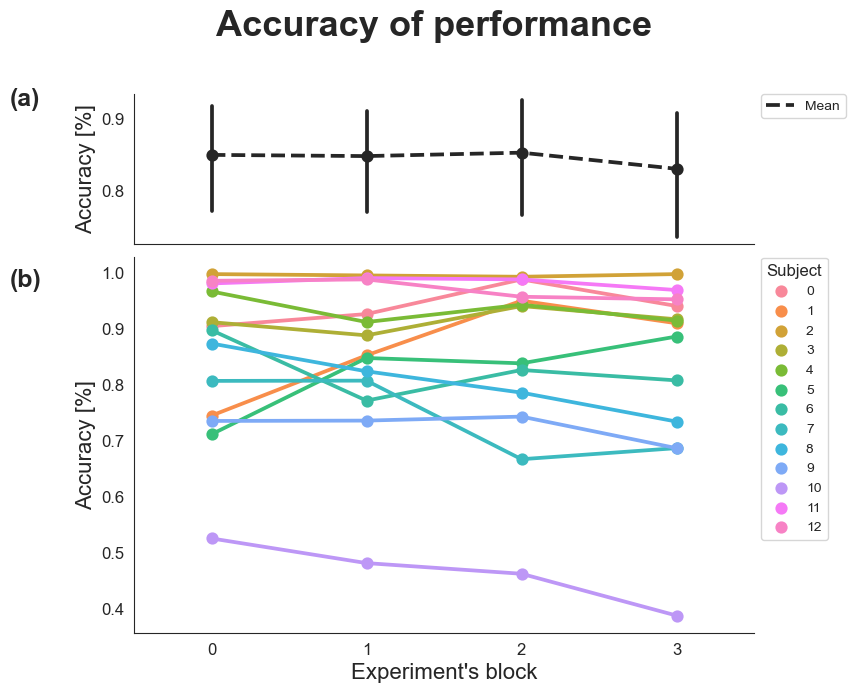

In [440]:
visualize_performance(df_per_selected, save=True)

In [442]:
block_performance = df_per_selected.groupby('block_number')['accuracy'].agg(['mean','std'])
dfi.export(block_performance, 'data/behavioral/block_performance.png')

61099 bytes written to file /var/folders/yy/s3wgmwl10fg_cc7cb_s92snr0000gn/T/tmpv1d49sym/temp.png


In [358]:
(df_per_selected['accuracy'].agg(['mean', 'std'])*100).round(1)

mean    84.5
std     14.7
Name: accuracy, dtype: float64